In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_lumoshive_data.csv')

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2200081736.py:1: DtypeWarning: Columns (4,6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_lumoshive_data.csv')


In [3]:
df.head()

,id,created_at,country,operator,service,source,msisdn,status,cycle,adnet,...,service_price,currency,profile_status,publisher,trxid,pixel,handset,browser,attempt_charging,success_billing
0,302164,2023-09-13 09:47:57,thailand,ais,459505104,sms,66988602911,not found,daily,not found,...,6.0,bath,active,not found,2.02309130707494e+19,not found,not found,not found,15,0
1,3521,2023-09-13 09:21:13,thailand,ais,459505104,sms,66822243080,not found,daily,not found,...,6.0,bath,active,not found,2.02309130707243e+19,not found,not found,not found,15,0
2,1,2023-09-13 09:20:20,thailand,ais,459505106,ivr,666131,not found,not found,not found,...,6.0,bath,active,not found,2.02308251402057e+19,not found,not found,not found,1,1
3,4999335,2023-09-13 14:00:22,thailand,ais,459505105,wap,66650020857,not found,daily,star,...,6.0,bath,active,star,2.02309130710521e+19,star,not found,not found,5,0
4,273196,2023-09-13 09:45:33,thailand,ais,459505104,sms,66635959286,not found,daily,not found,...,6.0,bath,active,not found,2.02309130701156e+19,not found,not found,not found,15,0


In [4]:
# Mapping dictionary for currency conversion
currency_mapping = {'bath': 441.23, 'cfa franc': 25.21040, 'lak': 0.75, 'kip': 0.75, 'rial': 4143.17, 'idr': 1, 'baisa': 4143.17, 'php': 279.48, 'baht':  449.06}

# Conversion function
def convert_to_rupiah(value, currency):
    conversion_rate = currency_mapping.get(currency, 1)
    return value * conversion_rate

# Apply the conversion to 'service_price' column and create a new column 'converted_service_price'
df['converted_service_price'] = df.apply(lambda row: convert_to_rupiah(row['service_price'], row['currency']), axis=1)

# Apply the conversion to 'revenue' column and create a new column 'converted_revenue'
df['converted_revenue'] = df.apply(lambda row: convert_to_rupiah(row['revenue'], row['currency']), axis=1)

# Display the updated DataFrame with new columns
print(df)
# Display the specific rows with the new columns
print(df[['service_price', 'currency', 'converted_service_price', 'revenue', 'converted_revenue']].head())

              id           created_at   country   operator    service source  \
0         302164  2023-09-13 09:47:57  thailand        ais  459505104    sms   
1           3521  2023-09-13 09:21:13  thailand        ais  459505104    sms   
2              1  2023-09-13 09:20:20  thailand        ais  459505106    ivr   
3        4999335  2023-09-13 14:00:22  thailand        ais  459505105    wap   
4         273196  2023-09-13 09:45:33  thailand        ais  459505104    sms   
...          ...                  ...       ...        ...        ...    ...   
365609     97584            not found  thailand        ais  459509903    sms   
365610    384166            not found  thailand        ais  459505105    wap   
365611  27966473            not found  thailand  aisgemezz         ge    sms   
365612    187009            not found  thailand        ais  459509903    sms   
365613  27906860            not found  thailand  aisgemezz         ge    sms   

             msisdn     status      cyc

In [5]:
# Sort data by ID and Service Price
df.sort_values(by=['id', 'service_price'], inplace=True)

# Create the label by grouping transactions by user ID and identify cross-sell events based on different service
df['up_sell'] = df['service_price'].gt(df.groupby('id')['service_price'].shift()) & \
                (df['profile_status'] == 'active')

# Fill NaN values in the first row after sorting
df['up_sell'].fillna(False, inplace=True)

In [6]:
df['up_sell'].value_counts()

up_sell
False    323365
True      42249
Name: count, dtype: int64

In [7]:
# Filter the DataFrame to include only rows where 'up_sell' is True
df_upsell_true = df[df['up_sell'] == True]

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1825748257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='up_sell', data=df, palette='viridis')


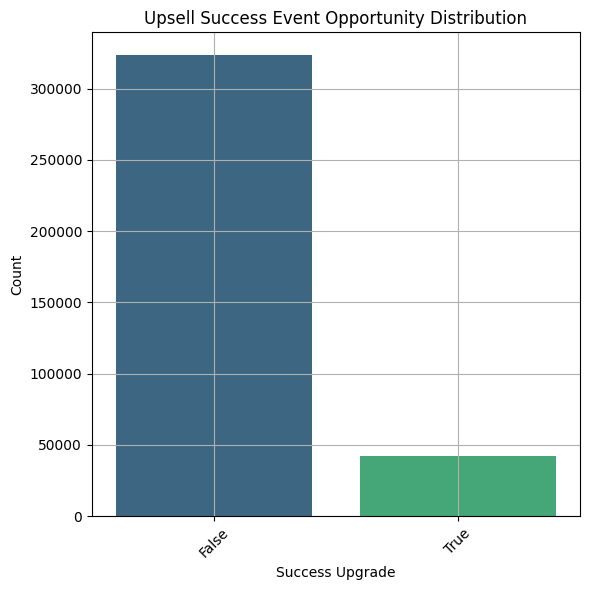

In [8]:
# Creating the barplot
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

sns.countplot(x='up_sell', data=df, palette='viridis')
plt.title('Upsell Success Event Opportunity Distribution')
plt.xlabel('Success Upgrade')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary
plt.grid()

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1930371319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df_upsell_true, palette='viridis', order = df_upsell_true['country'].value_counts().index)


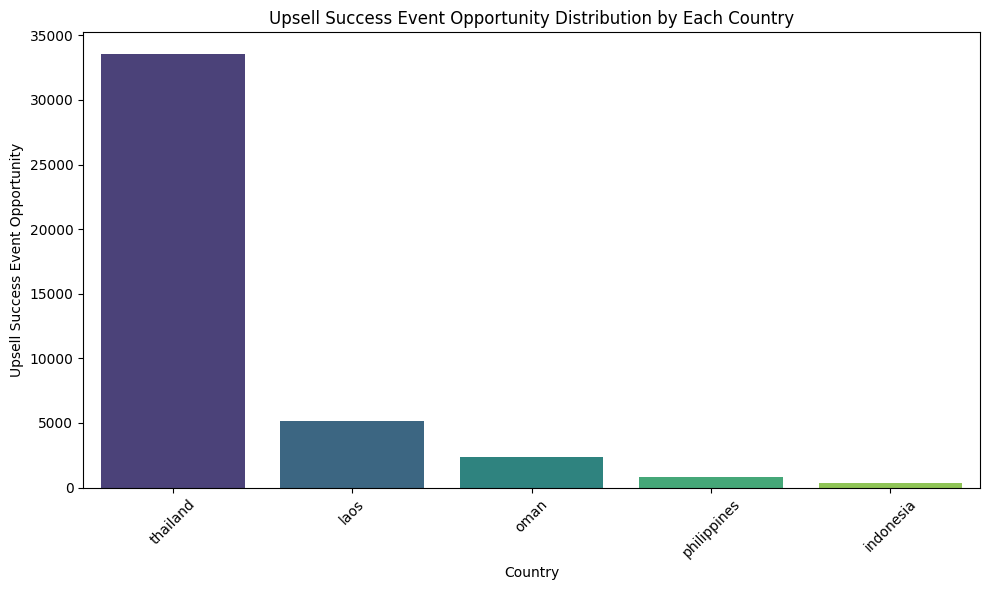

In [9]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='country', data=df_upsell_true, palette='viridis', order = df_upsell_true['country'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Country')
plt.xlabel('Country')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/666445864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='operator', data=df_upsell_true, palette='viridis', order=df_upsell_true['operator'].value_counts().index)


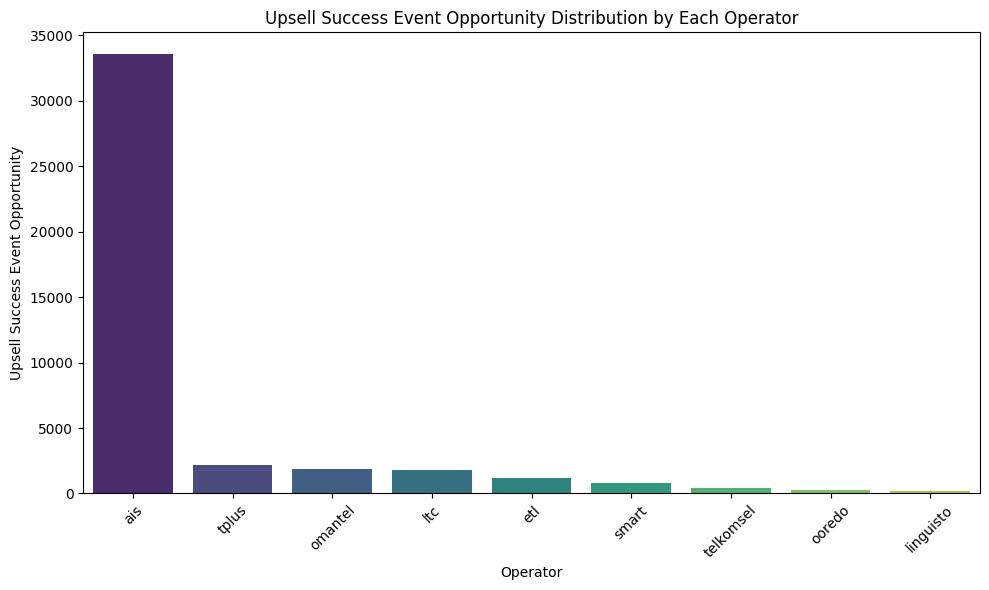

In [10]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='operator', data=df_upsell_true, palette='viridis', order=df_upsell_true['operator'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Operator')
plt.xlabel('Operator')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/409935454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adnet', data=df_upsell_true, palette='viridis', order = df_upsell_true['adnet'].value_counts().index)


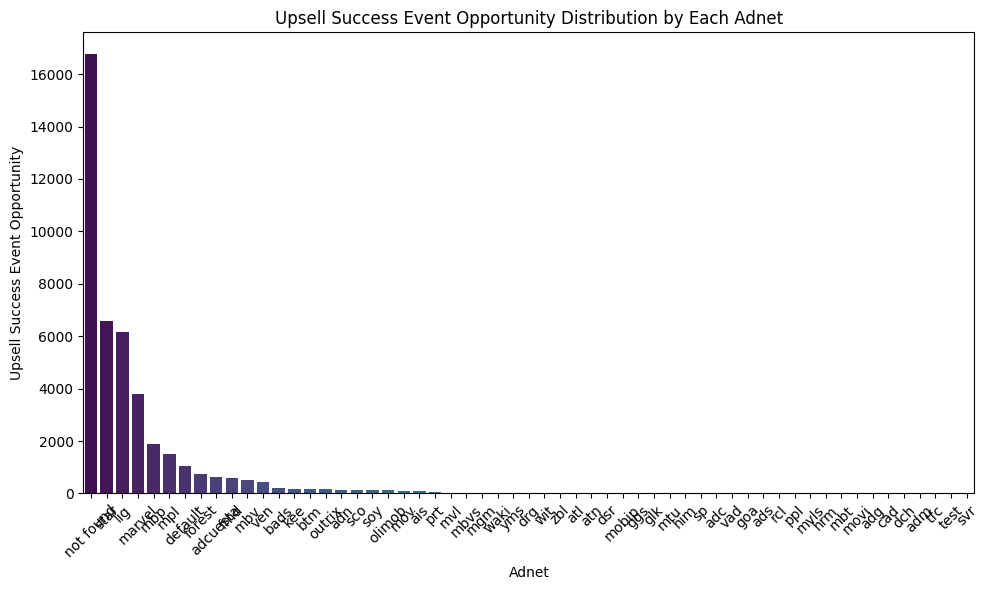

In [11]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='adnet', data=df_upsell_true, palette='viridis', order = df_upsell_true['adnet'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Adnet')
plt.xlabel('Adnet')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/3625527529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source', data=df_upsell_true, palette='viridis', order = df_upsell_true['source'].value_counts().index)


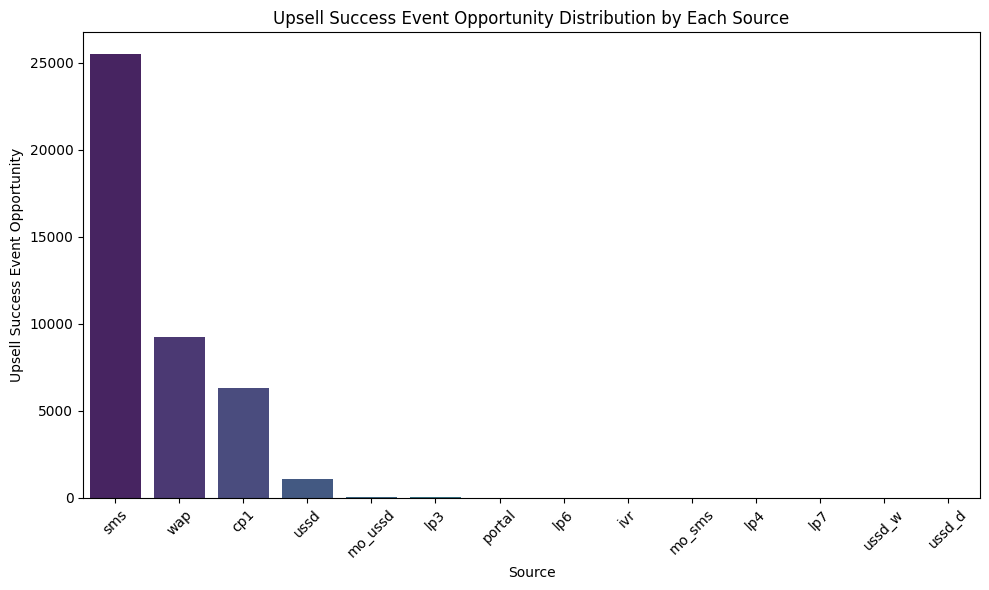

In [12]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='source', data=df_upsell_true, palette='viridis', order = df_upsell_true['source'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Source')
plt.xlabel('Source')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/3322559525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cycle', data=df_upsell_true, palette='viridis', order = df_upsell_true['cycle'].value_counts().index)


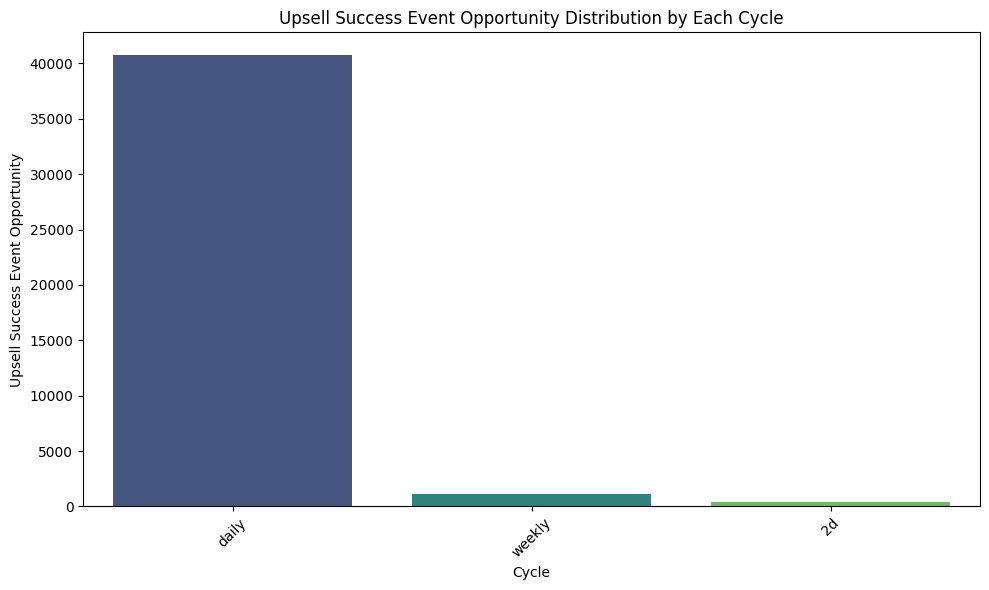

In [13]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='cycle', data=df_upsell_true, palette='viridis', order = df_upsell_true['cycle'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Cycle')
plt.xlabel('Cycle')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1675868544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service', data=df_upsell_true, palette='viridis', order = df_upsell_true['service'].value_counts().index)


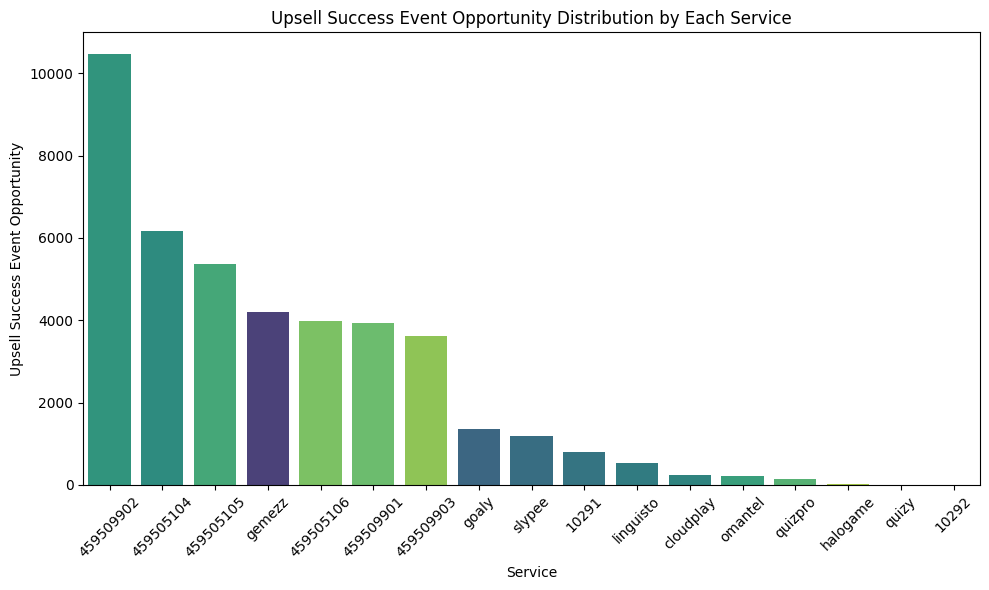

In [14]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='service', data=df_upsell_true, palette='viridis', order = df_upsell_true['service'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Service')
plt.xlabel('Service')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2851595947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='currency', data=df_upsell_true, palette='viridis', order = df_upsell_true['currency'].value_counts().index)


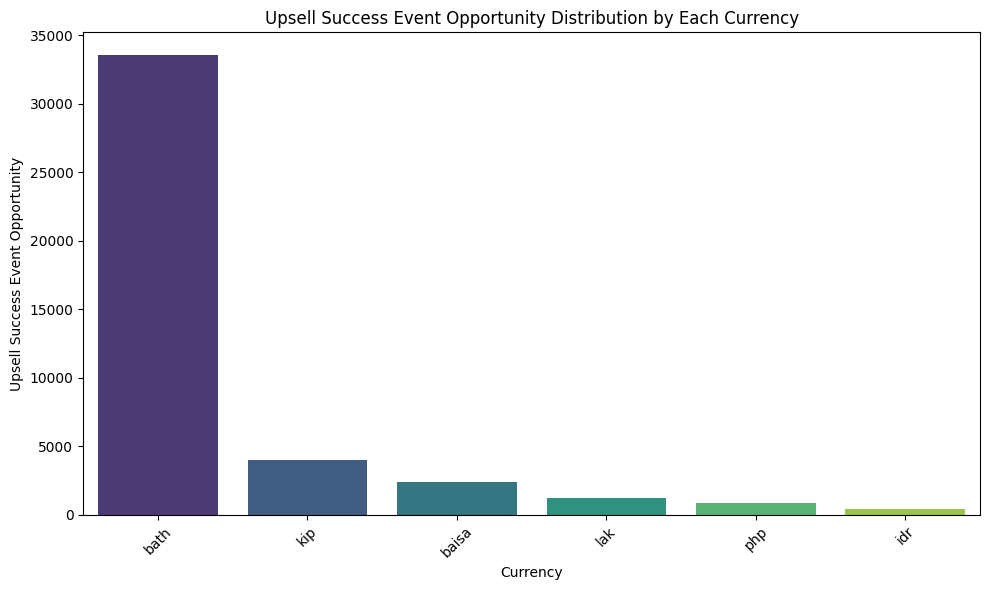

In [15]:
# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.countplot(x='currency', data=df_upsell_true, palette='viridis', order = df_upsell_true['currency'].value_counts().index)
plt.title('Upsell Success Event Opportunity Distribution by Each Currency')
plt.xlabel('Currency')
plt.ylabel('Upsell Success Event Opportunity')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/3129053124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])  # Replace 'Subs Date' with the actual column name


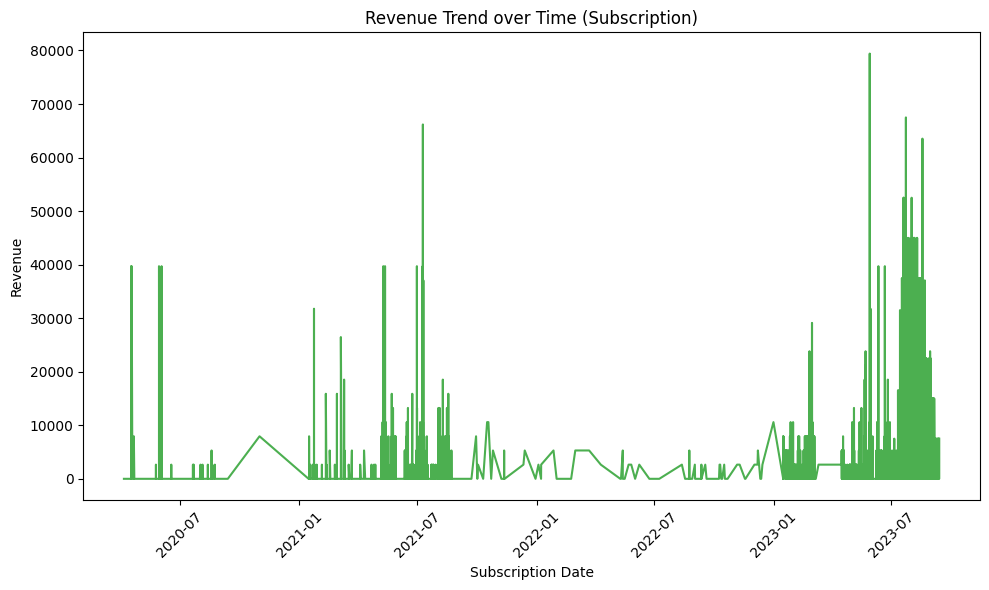

In [16]:
# Convert 'Subs Date' or 'Renewal Date' column to datetime if not already in datetime format
df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])  # Replace 'Subs Date' with the actual column name

# Group by 'Subs Date' or 'Renewal Date' and sum the revenue for each date
revenue_over_time = df_upsell_true.groupby('subs_date')['converted_revenue'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(revenue_over_time['subs_date'], revenue_over_time['converted_revenue'], color='#4CAF50')

plt.title('Revenue Trend over Time (Subscription)')
plt.xlabel('Subscription Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/3692989875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['renewal_date'] = pd.to_datetime(df_upsell_true['renewal_date'], format='mixed')  # Replace 'Subs Date' with the actual column name


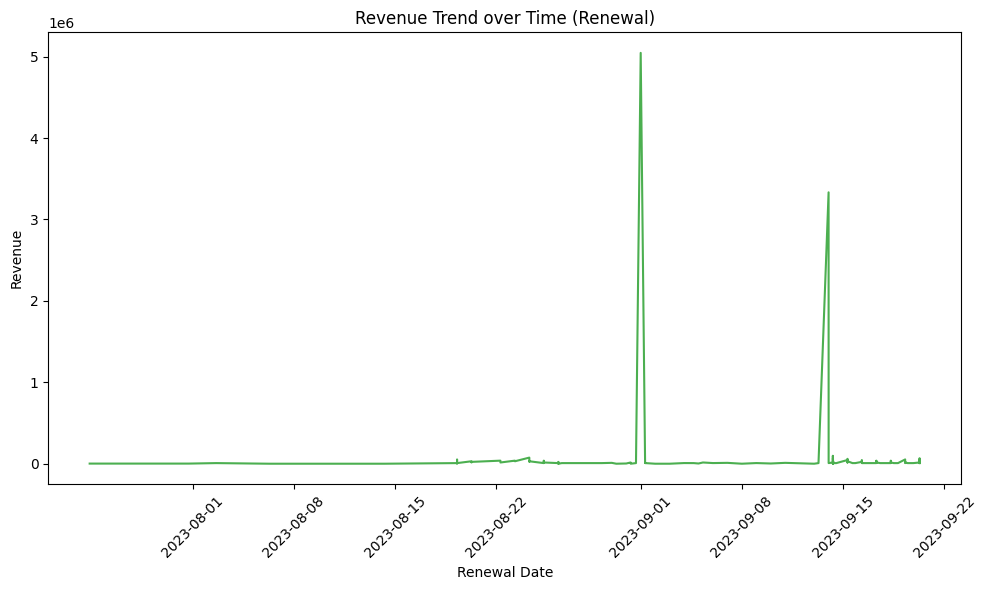

In [17]:
# Convert 'Subs Date' or 'Renewal Date' column to datetime if not already in datetime format
df_upsell_true['renewal_date'] = pd.to_datetime(df_upsell_true['renewal_date'], format='mixed')  # Replace 'Subs Date' with the actual column name

# Group by 'Subs Date' or 'Renewal Date' and sum the revenue for each date
revenue_over_time = df_upsell_true.groupby('renewal_date')['converted_revenue'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(revenue_over_time['renewal_date'], revenue_over_time['converted_revenue'], color='#4CAF50')

plt.title('Revenue Trend over Time (Renewal)')
plt.xlabel('Renewal Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

In [18]:
df_upsell_true['unsubs_date'] = pd.to_datetime(df_upsell_true['unsubs_date'], utc=True, errors='coerce')
df_upsell_true['unsubs_date'] = df_upsell_true['unsubs_date'].dt.strftime('%Y-%m-%d %H:%M:%S')

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/4136845291.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_upsell_true['unsubs_date'] = pd.to_datetime(df_upsell_true['unsubs_date'], utc=True, errors='coerce')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/4136845291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['unsubs_date'] = pd.to_datetime(df_upsell_true['unsubs_date'], utc=True, errors='coerce')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/4136845291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [19]:
# Create a condition for 'subscription_duration' based on 'unsubs_date' being not null
condition = df_upsell_true['unsubs_date'].notnull()
df_upsell_true['unsubs_date'] = pd.to_datetime(df_upsell_true['unsubs_date'])
df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])
df_upsell_true['created_at'] = pd.to_datetime(df_upsell_true['created_at'], errors='coerce')

# Apply the condition using numpy.where
df_upsell_true['subscription_duration'] = np.where(
    condition,
    (df_upsell_true['unsubs_date'] - df_upsell_true['subs_date']).dt.days,
    (df_upsell_true['created_at'] - df_upsell_true['subs_date']).dt.days
)

df_upsell_true['subscription_duration'] = df_upsell_true['subscription_duration'].fillna(-1)

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2523721167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['unsubs_date'] = pd.to_datetime(df_upsell_true['unsubs_date'])
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2523721167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2523721167.py:5: SettingWithCopyWarning

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/3932736431.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=valid_time_since_subs, x='subscription_duration', bins=30, kde=True, palette='viridis')


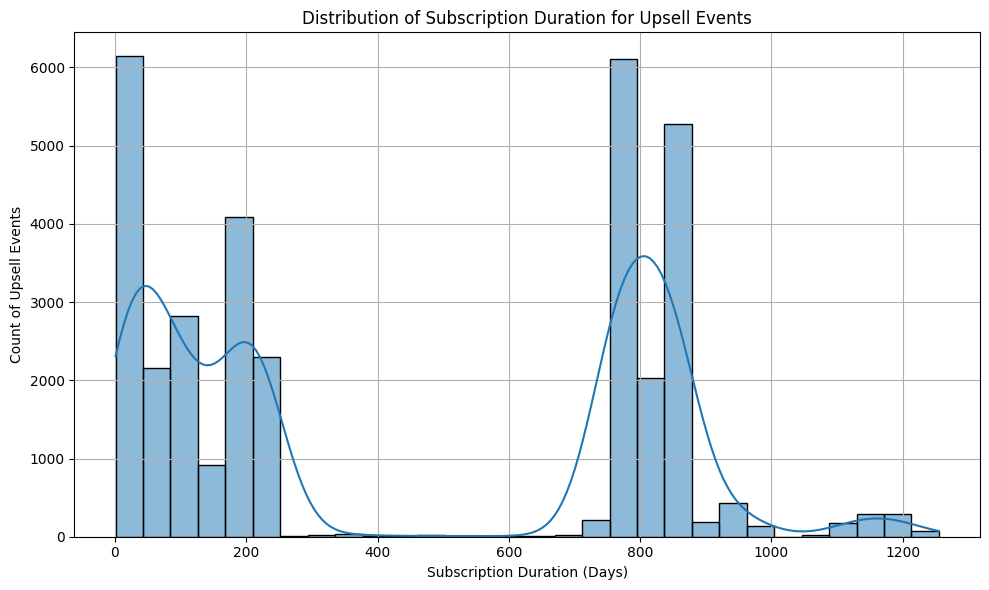

In [34]:
# Filter out rows where subscription date is missing (-1 indicates missing values)
valid_time_since_subs = df_upsell_true[df_upsell_true['subscription_duration'] > 0]

# Creating the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(data=valid_time_since_subs, x='subscription_duration', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Subscription Duration for Upsell Events')
plt.xlabel('Subscription Duration (Days)')
plt.ylabel('Count of Upsell Events')
plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1713531493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['freemium_end_date'] = pd.to_datetime(df_upsell_true['freemium_end_date'], format='mixed')  # Replace 'Subs Date' with the actual column name


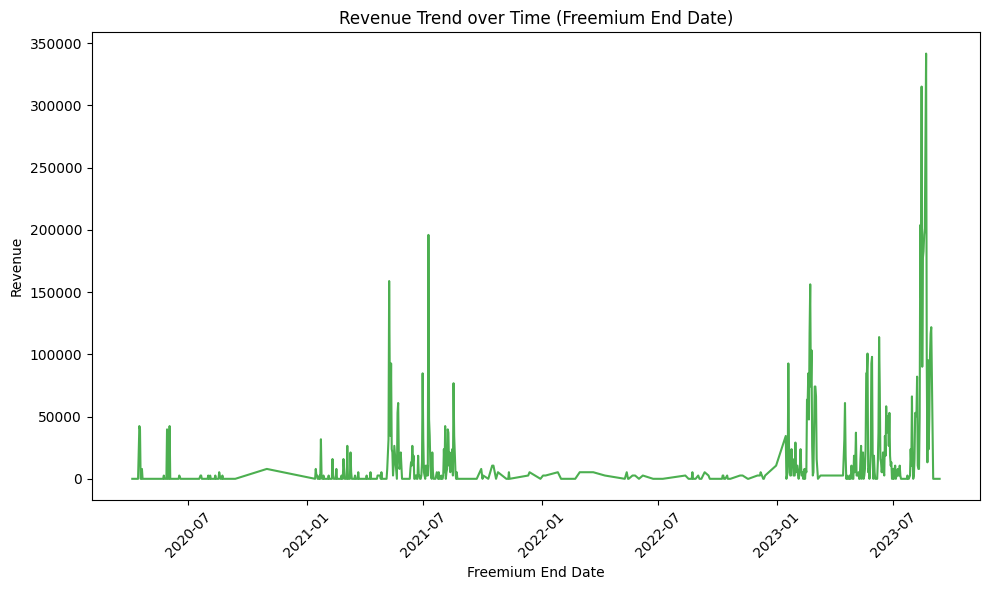

In [21]:
# Convert 'Subs Date' or 'Renewal Date' column to datetime if not already in datetime format
df_upsell_true['freemium_end_date'] = pd.to_datetime(df_upsell_true['freemium_end_date'], format='mixed')  # Replace 'Subs Date' with the actual column name

# Group by 'Subs Date' or 'Renewal Date' and sum the revenue for each date
revenue_over_time = df_upsell_true.groupby('freemium_end_date')['converted_revenue'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(revenue_over_time['freemium_end_date'], revenue_over_time['converted_revenue'], color='#4CAF50')

plt.title('Revenue Trend over Time (Freemium End Date)')
plt.xlabel('Freemium End Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary

plt.tight_layout()
plt.show()

In [22]:
# Convert 'subs_date' column to datetime format if it's not already in datetime64 format
df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])

# Extract year, month, and day as separate numerical features
df_upsell_true['subs_year'] = df_upsell_true['subs_date'].dt.year
df_upsell_true['subs_month'] = df_upsell_true['subs_date'].dt.month
df_upsell_true['subs_day'] = df_upsell_true['subs_date'].dt.day
df_upsell_true['subs_hour'] = df_upsell_true['subs_date'].dt.hour
df_upsell_true['subs_minute'] = df_upsell_true['subs_date'].dt.minute
df_upsell_true['subs_second'] = df_upsell_true['subs_date'].dt.second

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1616445787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['subs_date'] = pd.to_datetime(df_upsell_true['subs_date'])
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1616445787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['subs_year'] = df_upsell_true['subs_date'].dt.year
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1616445787.py:6: SettingWithCopyWarning: 
A value i

In [23]:
# Convert 'subs_date' column to datetime format if it's not already in datetime64 format
df_upsell_true['freemium_end_date'] = pd.to_datetime(df_upsell_true['freemium_end_date'])

# Extract year, month, and day as separate numerical features
df_upsell_true['freemium_end_year'] = df_upsell_true['freemium_end_date'].dt.year
df_upsell_true['freemium_end_month'] = df_upsell_true['freemium_end_date'].dt.month
df_upsell_true['freemium_end_day'] = df_upsell_true['freemium_end_date'].dt.day
df_upsell_true['freemium_end_hour'] = df_upsell_true['freemium_end_date'].dt.hour
df_upsell_true['freemium_end_minute'] = df_upsell_true['freemium_end_date'].dt.minute
df_upsell_true['freemium_end_second'] = df_upsell_true['freemium_end_date'].dt.second

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1322472647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['freemium_end_date'] = pd.to_datetime(df_upsell_true['freemium_end_date'])
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1322472647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['freemium_end_year'] = df_upsell_true['freemium_end_date'].dt.year
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1322472647.py:6: Se

In [24]:
# Convert 'subs_date' column to datetime format if it's not already in datetime64 format
df_upsell_true['renewal_date'] = pd.to_datetime(df_upsell_true['renewal_date'])

# Extract year, month, and day as separate numerical features
df_upsell_true['renewal_year'] = df_upsell_true['renewal_date'].dt.year
df_upsell_true['renewal_month'] = df_upsell_true['renewal_date'].dt.month
df_upsell_true['renewal_day'] = df_upsell_true['renewal_date'].dt.day
df_upsell_true['renewal_hour'] = df_upsell_true['renewal_date'].dt.hour
df_upsell_true['renewal_minute'] = df_upsell_true['renewal_date'].dt.minute
df_upsell_true['renewal_second'] = df_upsell_true['renewal_date'].dt.second

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1461898268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['renewal_date'] = pd.to_datetime(df_upsell_true['renewal_date'])
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1461898268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsell_true['renewal_year'] = df_upsell_true['renewal_date'].dt.year
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1461898268.py:6: SettingWithCopyWarning

In [25]:
def show_distribution_subscription_date(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'subs_year', data = df, palette='viridis')
    axes[0][0].set_xlabel(xlabel = 'Subscription Year', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Subscription Year', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'subs_month', data = df, palette='viridis')
    axes[0][1].set_xlabel(xlabel = 'Subscription Month', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Subscription Month',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'subs_day', data = df, palette='viridis')
    axes[1][0].set_xlabel(xlabel = 'Subscription Day', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Subscription Day',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][1],x = 'subs_hour', data = df, palette='viridis')
    axes[1][1].set_xlabel(xlabel = 'Subscription Hour', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Subscription Hour',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Subscription Date Feature in Upsell Event Opportunity', fontsize = 22, fontweight = 'bold')

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/852685043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][0],x = 'subs_year', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/852685043.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][1],x = 'subs_month', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/852685043.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1][0],x = 'subs_day', 

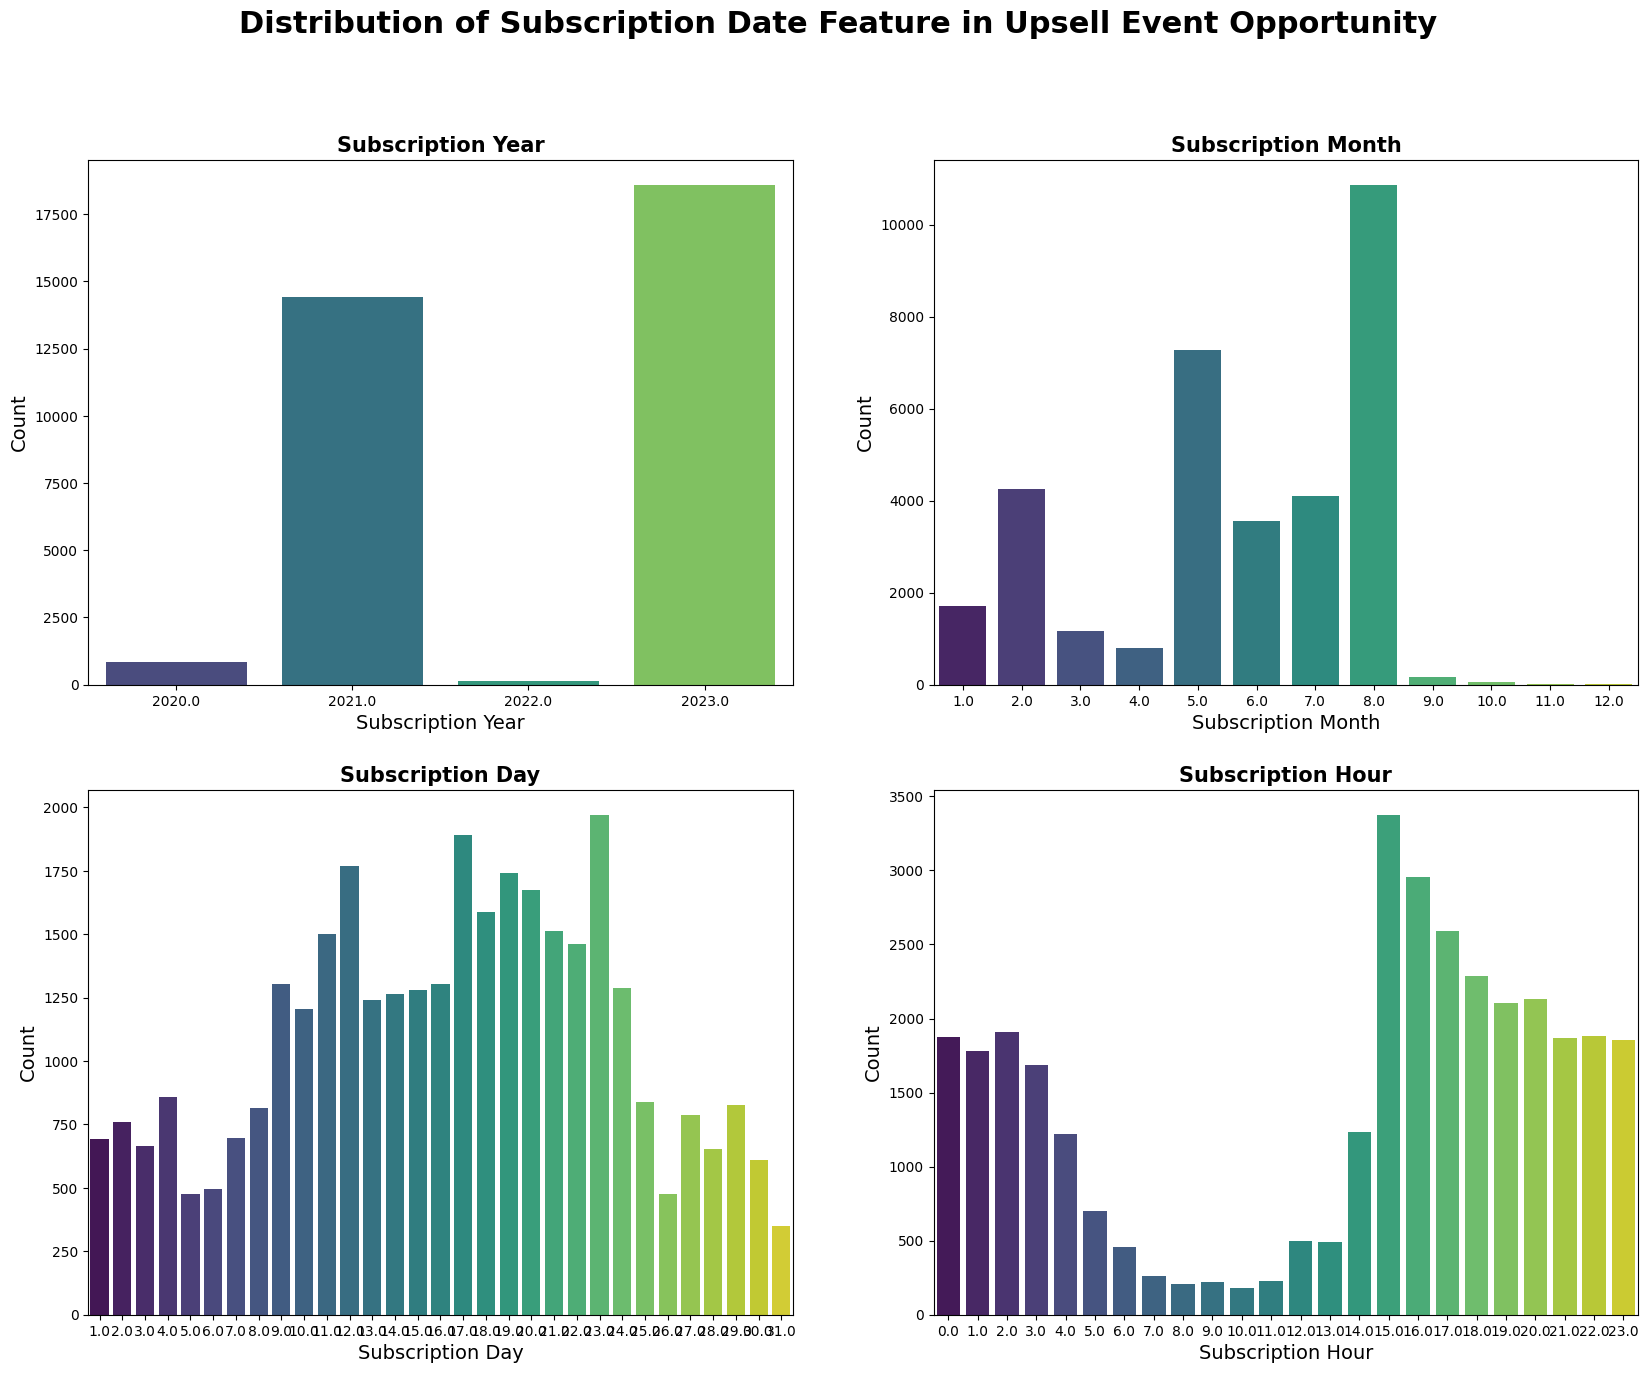

In [26]:
show_distribution_subscription_date(df_upsell_true)

In [27]:
def show_distribution_renewal_date(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'renewal_year', data = df, palette='viridis')
    axes[0][0].set_xlabel(xlabel = 'Renewal Year', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Renewal Year', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'renewal_month', data = df, palette='viridis')
    axes[0][1].set_xlabel(xlabel = 'Renewal Month', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Renewal Month',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'renewal_day', data = df, palette='viridis')
    axes[1][0].set_xlabel(xlabel = 'Renewal Day', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Renewal Day',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][1],x = 'renewal_hour', data = df, palette='viridis')
    axes[1][1].set_xlabel(xlabel = 'Renewal Hour', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Renewal Hour',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Renewal Date Feature in Upsell Event Opportunity', fontsize = 22, fontweight = 'bold')

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2996816545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][0],x = 'renewal_year', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2996816545.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][1],x = 'renewal_month', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2996816545.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1][0],x = 're

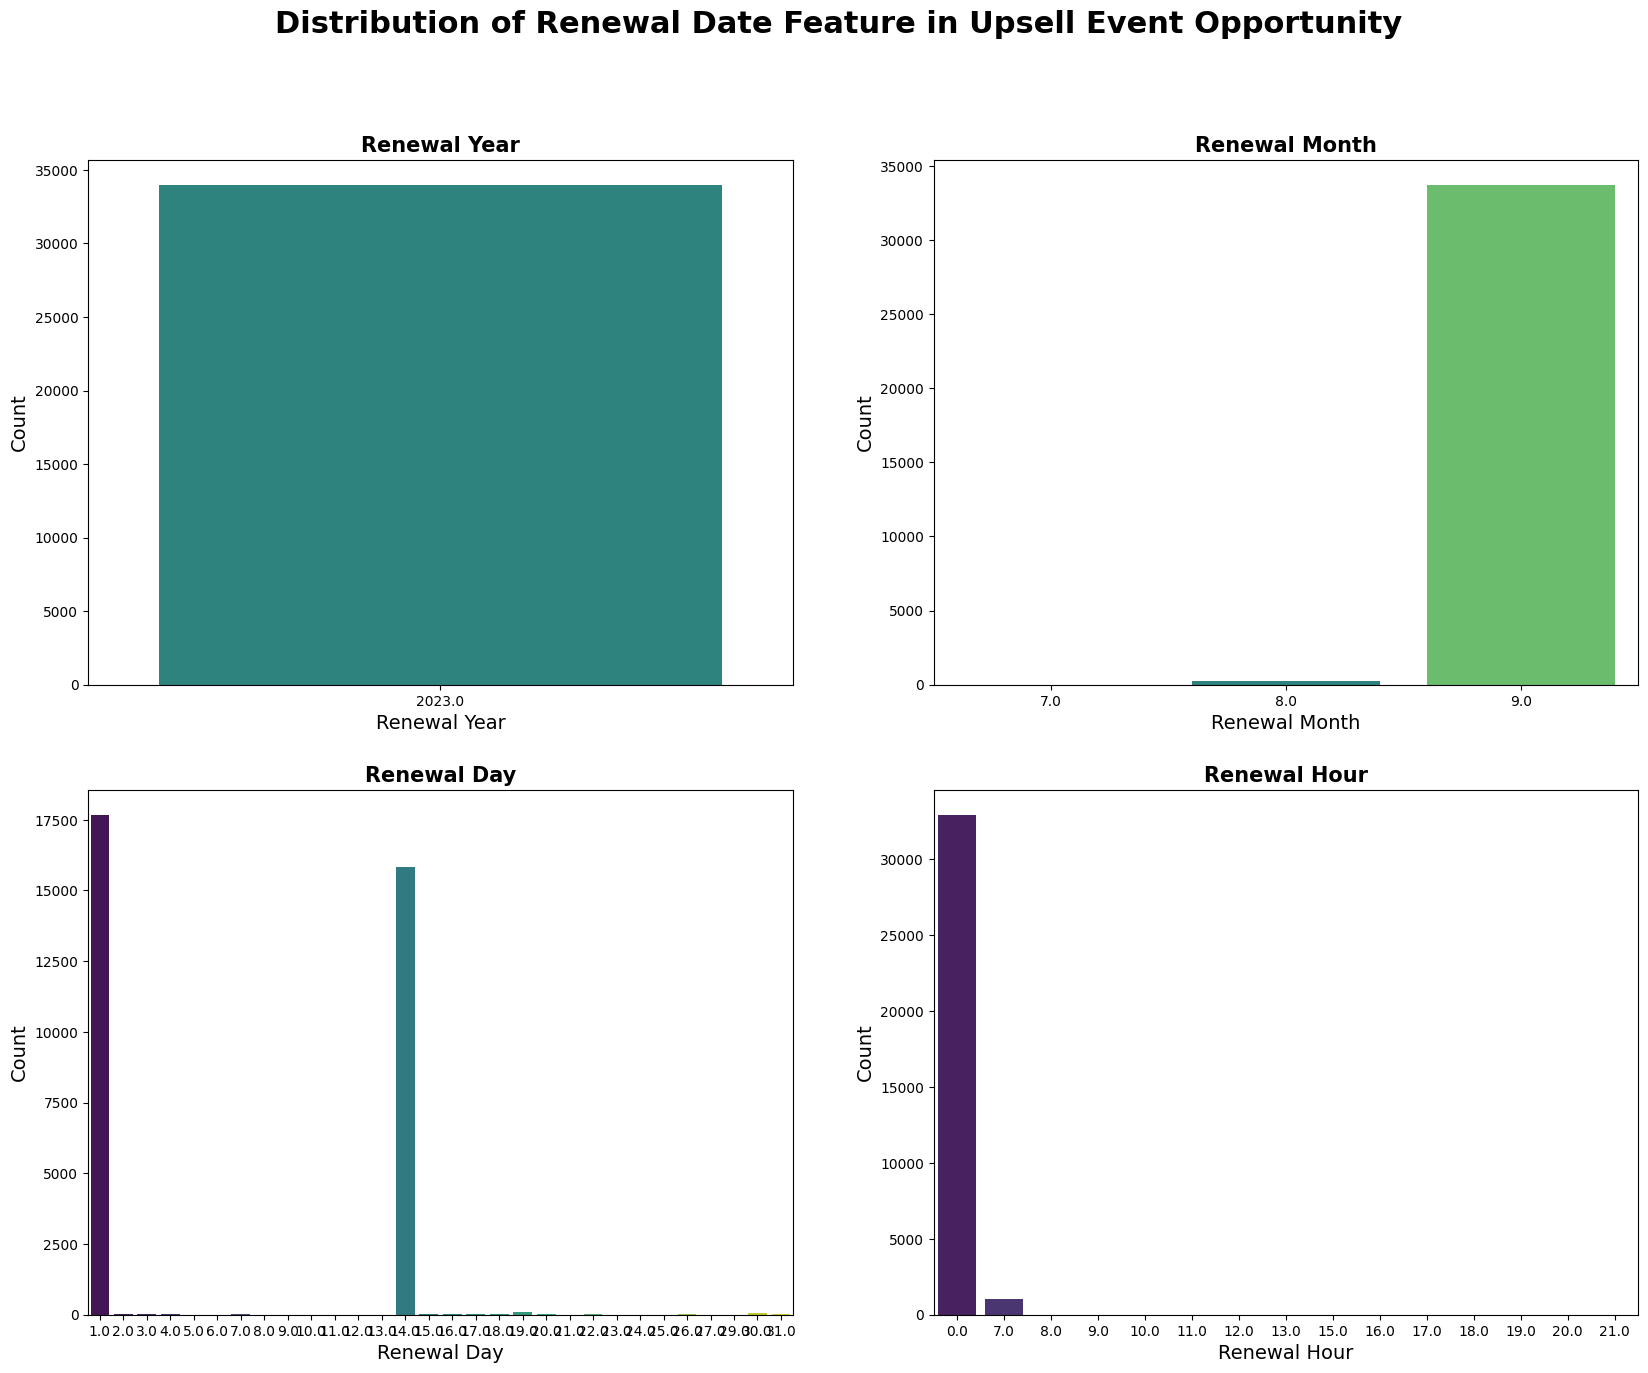

In [28]:
show_distribution_renewal_date(df_upsell_true)

In [29]:
def show_distribution_freemium_date(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'freemium_end_year', data = df, palette='viridis')
    axes[0][0].set_xlabel(xlabel = 'Freemium Year', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Freemium Year', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'freemium_end_month', data = df, palette='viridis')
    axes[0][1].set_xlabel(xlabel = 'Freemium Month', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Freemium Month',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'freemium_end_day', data = df, palette='viridis')
    axes[1][0].set_xlabel(xlabel = 'Freemium Day', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Freemium Day',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][1],x = 'freemium_end_hour', data = df, palette='viridis')
    axes[1][1].set_xlabel(xlabel = 'Freemium Hour', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Freemium Hour',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Freemium Date Feature in Upsell Event Opportunity', fontsize = 22, fontweight = 'bold')

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2137563794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][0],x = 'freemium_end_year', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2137563794.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[0][1],x = 'freemium_end_month', data = df, palette='viridis')
/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/2137563794.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1][

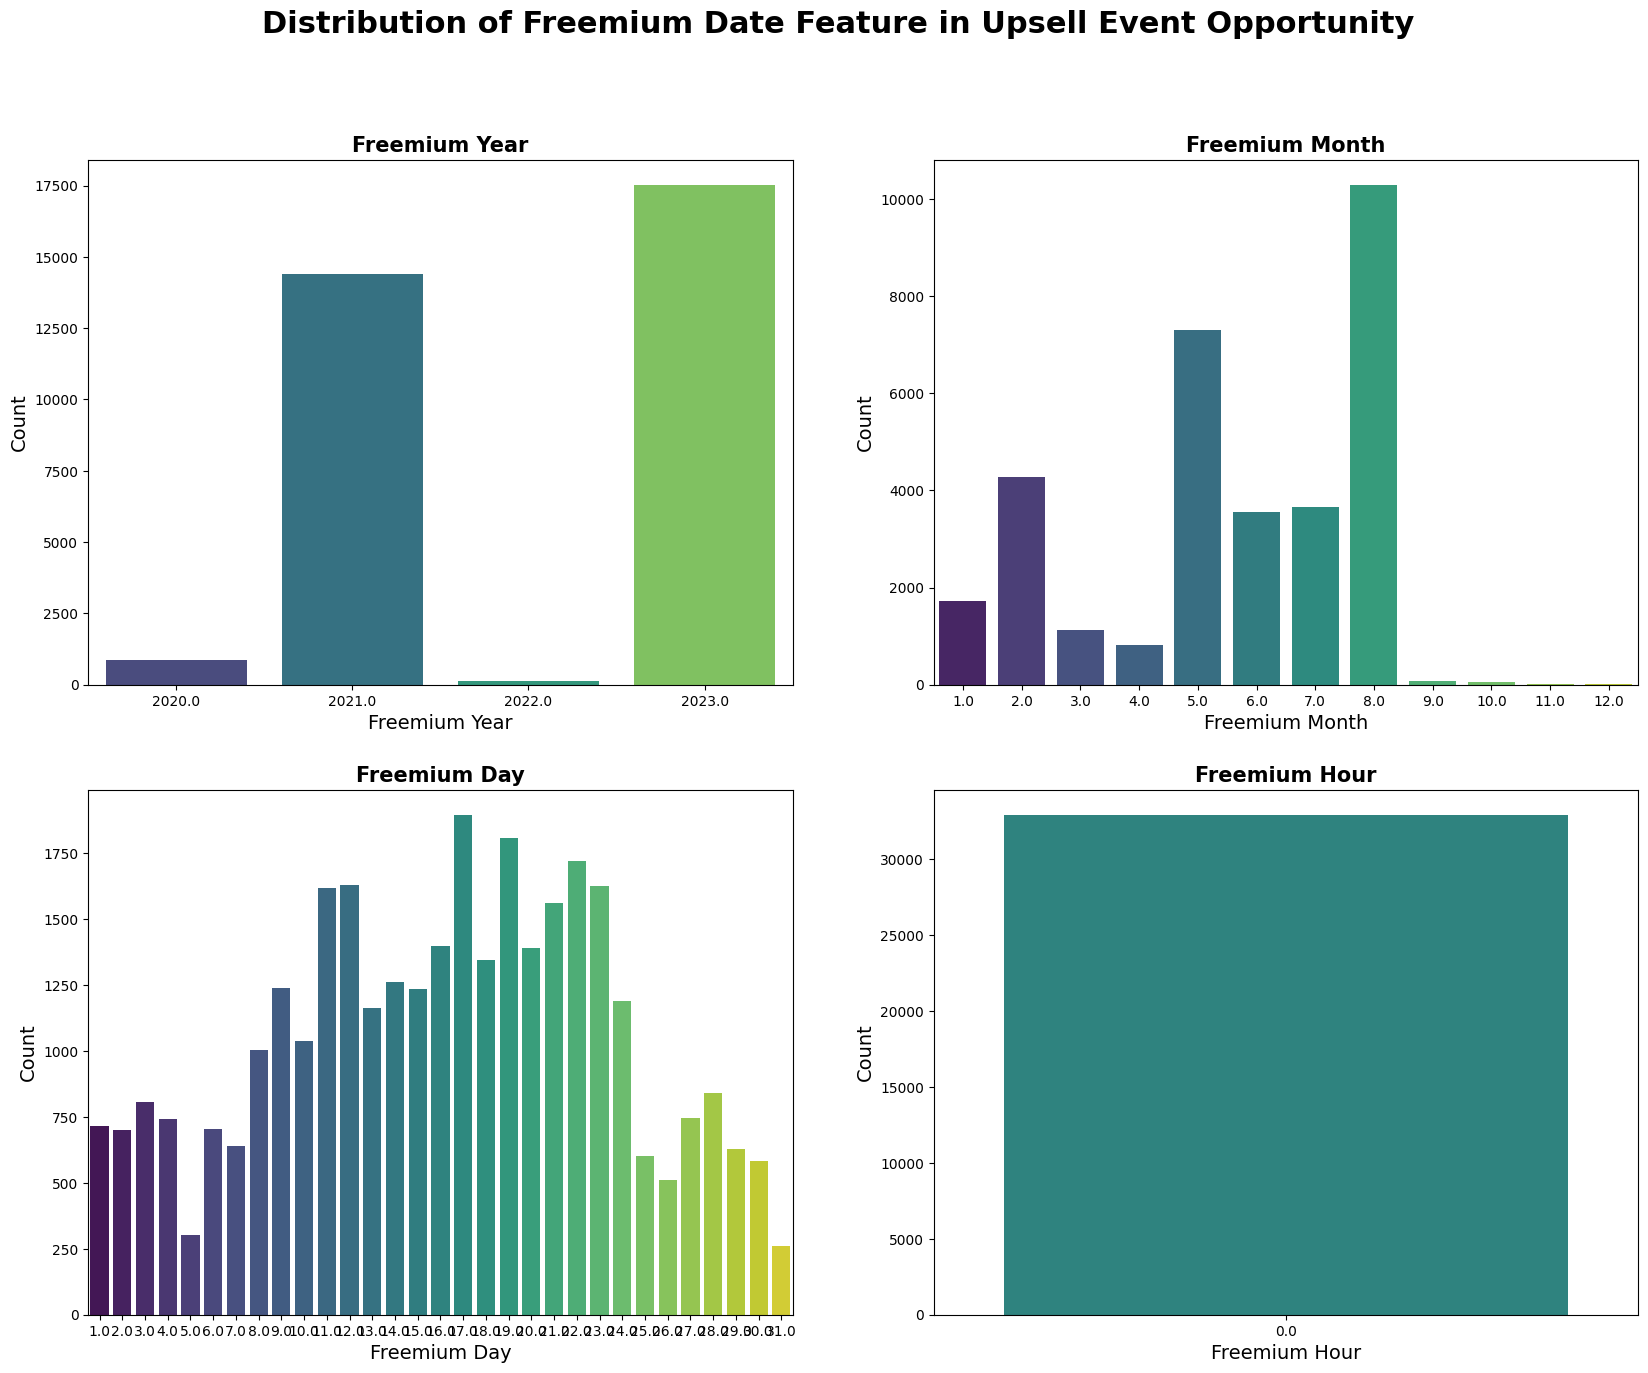

In [30]:
show_distribution_freemium_date(df_upsell_true)

/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_59482/1300839533.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_upsell_true, x='converted_service_price', bins=5, kde=True, palette='viridis')


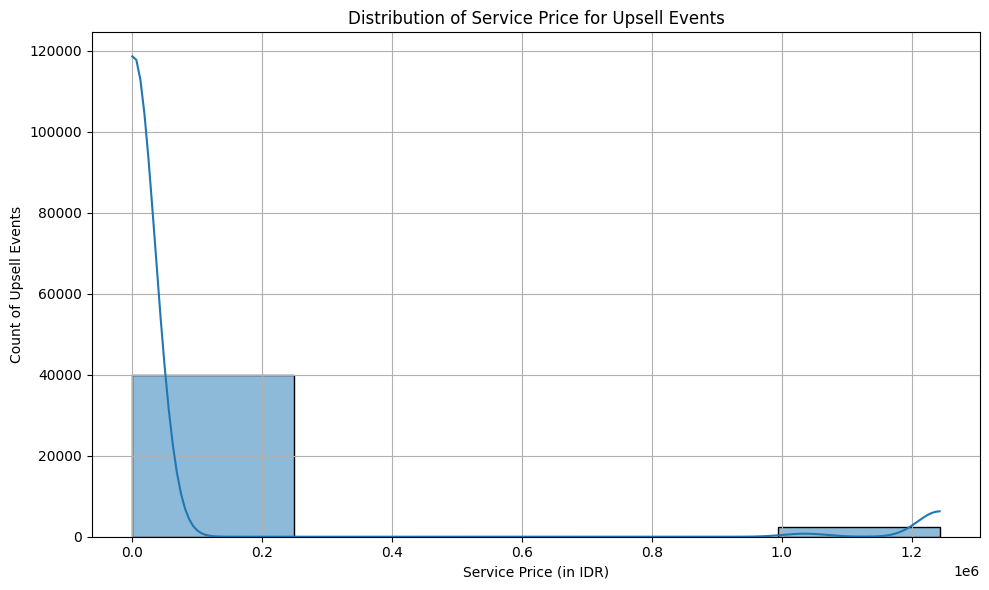

In [31]:
# Creating the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(data=df_upsell_true, x='converted_service_price', bins=5, kde=True, palette='viridis')
plt.title('Distribution of Service Price for Upsell Events')
plt.xlabel('Service Price (in IDR)')
plt.ylabel('Count of Upsell Events')
plt.grid(True)

plt.tight_layout()
plt.show()